In [1]:
import numpy as np
from matplotlib import pyplot as plt

from lab7.classes.Camera import Camera
from lab7.classes.Light import Light
from lab7.classes.Sphere import Sphere
from lab7.classes.Scene import Scene
from lab7.classes.RayTracer import RayTracer

plt.rcParams['figure.figsize'] = [12, 8]

# Przykład

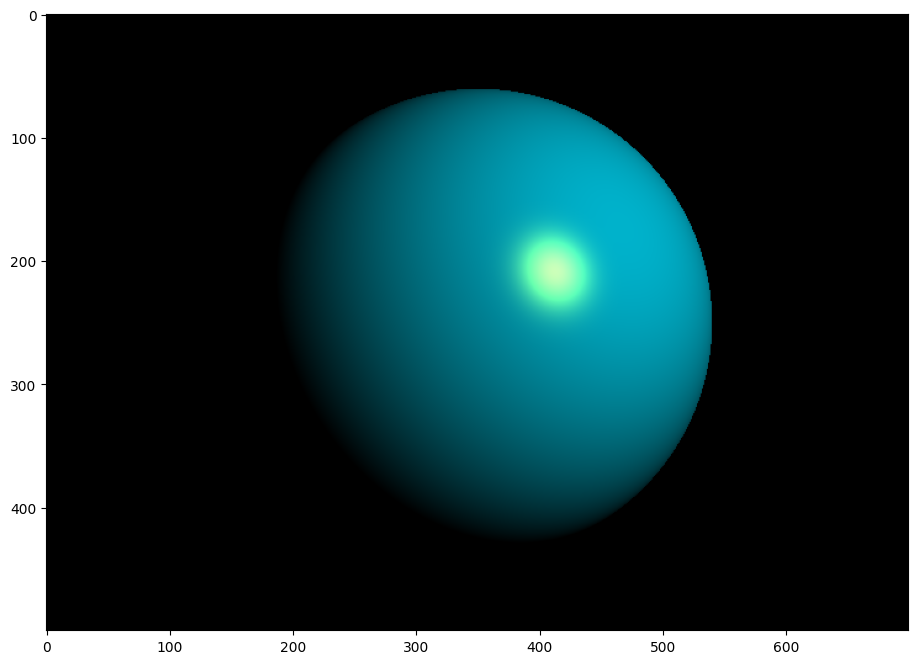

In [2]:
scene = Scene(
    objects=[Sphere(position=np.array([0, 0, 0]), radius=1.5)],
    light=Light(position=np.array([3, 2, 5])),
    camera=Camera(position=np.array([0, 0, 5]))
)

rt = RayTracer(scene)
image = np.clip(rt.generate_image(), 0, 1)
plt.imshow(image)

# Zadanie 1

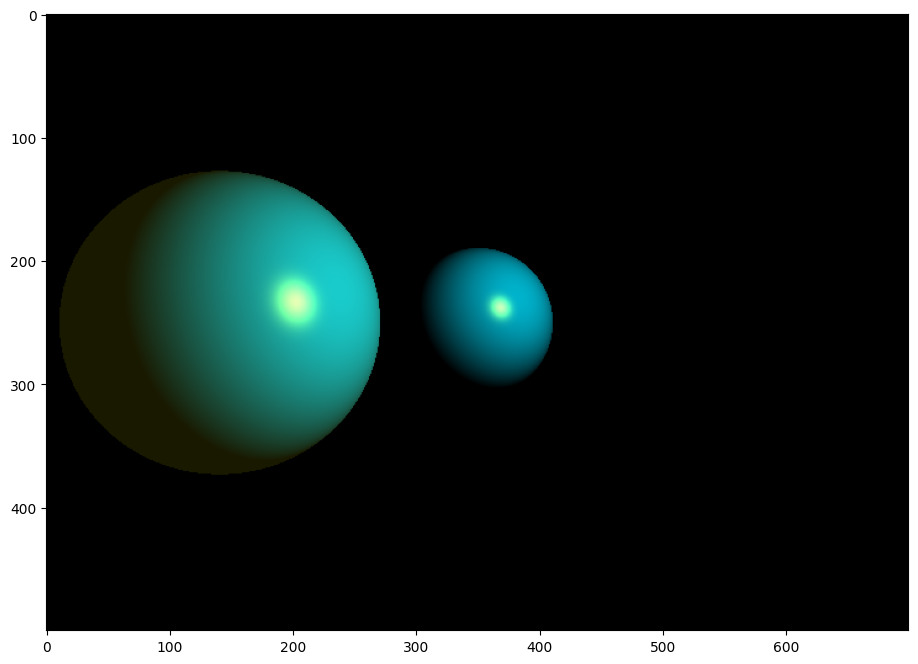

In [20]:
# TODO: Zmodyfikuj scenę – dodaj przynajmniej jedną sferę.
#       Można zmienić położenie, kolor, promień, itd.

scene = Scene(
    objects=[
        Sphere(position=np.array([0, 0, 0]), radius=1.5),
        Sphere(position=np.array([-5, 0, 0]), radius=3, ambient=np.array([1, 1, 0]),)
    ],
    light=Light(position=np.array([3, 2, 5])),
    camera=Camera(position=np.array([0, 0, 15]))
)

rt = RayTracer(scene)
image = np.clip(rt.generate_image(), 0, 1)
plt.imshow(image)

# Zadanie 2

In [4]:
# TODO: Zmień funkcję _get_pixel_color() tak, aby działała rekurencyjnie.
#       Kolor wyjściowy powinien być ważoną sumą koloru obiektu i koloru uzyskanego przez odbicie
#       (wagi należy dobrać eksperymentalnie, samodzielnie, np. 0.7 i 0.3).
#       Należy również pamiętać o ograniczeniu liczby odbić (parametr depth).

class MyRayTracer(RayTracer):
    def _get_pixel_color(self, ray, depth=3):
        """Gets a single color based on a ray.

        :return np.array: A hit object color or a background.
        """

        obj, distance, cross_point = self._get_closest_object(ray)

        if not obj:
            return self.scene.background

        return obj.get_color(cross_point, ray.direction, self.scene)

# Zadanie 3

In [5]:
from lab7.utils import normalize, reflect


# TODO: Zmodyfikuj funkcję get_color() tak, aby upewnić się, ze dany punkt nie znajduje się w cieniu.
#       Innymi słowy, pomiędzy punktem przecięcia, a źródłem światła, nie może znajdować się żaden obiekt.
#       Jak coś się tam znajduje – to w finalnym kolorze nie uwzględniamy koloru z modelu Phonga.

class MySphere(Sphere):
    def get_color(self, cross_point, obs_vector, scene):
        """Returns a color of an object in a given point.

        :param np.array cross_point: a point on a surface
        :param np.array obs_vector: observation vector used in Phong model
        :param Scene scene: A scene object (for lights)
        """
        color = self.ambient * scene.ambient
        light = scene.light

        normal = self.get_normal(cross_point)
        light_vector = normalize(light.position - cross_point)
        n_dot_l = np.dot(light_vector, normal)
        reflection_vector = normalize(reflect(-1 * light_vector, normal))

        v_dot_r = np.dot(reflection_vector, -obs_vector)

        if v_dot_r < 0:
            v_dot_r = 0

        if n_dot_l > 0:
            color += (
                (self.diffuse * light.diffuse * n_dot_l) +
                (self.specular * light.specular * v_dot_r**self.shining) +
                (self.ambient * light.ambient)
            )

        return color

# Zadanie 4

In [6]:
# TODO: Zmień funkcję _get_pixel_color() tak, aby uwzględniała przezroczystość
#       (z punktu przecięcia wysyłamy wtedy dwa promienie: odbity i załamany).
#       Do wag finalnego koloru dodajemy kolejną, uwzględniającą przezroczystość obiektów
#       (np. kolor lokalny: 0.4, odbity: 0.3, załamany: 0.3).
#       Tę ostatnią wagę należy wyznaczyć, bazując na stopniu przeźroczystości obiektu.

class MyRayTracer2(RayTracer):
    def _get_pixel_color(self, ray, depth=3):
        """Gets a single color based on a ray.

        :return np.array: A hit object color or a background.
        """

        obj, distance, cross_point = self._get_closest_object(ray)

        if not obj:
            return self.scene.background

        return obj.get_color(cross_point, ray.direction, self.scene)

# Zadanie 5

In [7]:
# TODO: Stwórz klasę dowolnego obiektu innego niż kula i wyświetl go.
#       Obiekt powinien dziedziczyć po klasie SceneObject.
#       Jeżeli zmodyfikowano wcześniej funkcję get_color() to w tej klasie również należy ją nadpisać.